In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
data_path = "train-data.csv"
car_dataset = pd.read_csv(data_path, engine='python')
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
car_dataset.isnull().mean()

,0
Unnamed: 0,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.000332
Engine,0.005981


In [ ]:
car_dataset = car_dataset.drop(['Unnamed: 0', 'New_Price'], axis = 1)
car_dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


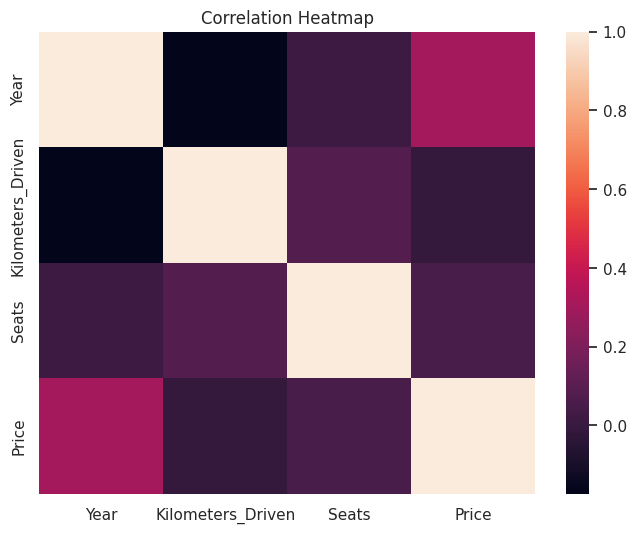

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8, 6]

# Select only numeric columns
numeric_data = car_dataset.select_dtypes(include=['number'])

# Generate heatmap without annotation
sns.heatmap(numeric_data.corr(), cbar=True)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-12-98d0ead648d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_dataset['Price'])


<Axes: xlabel='Price', ylabel='Density'>

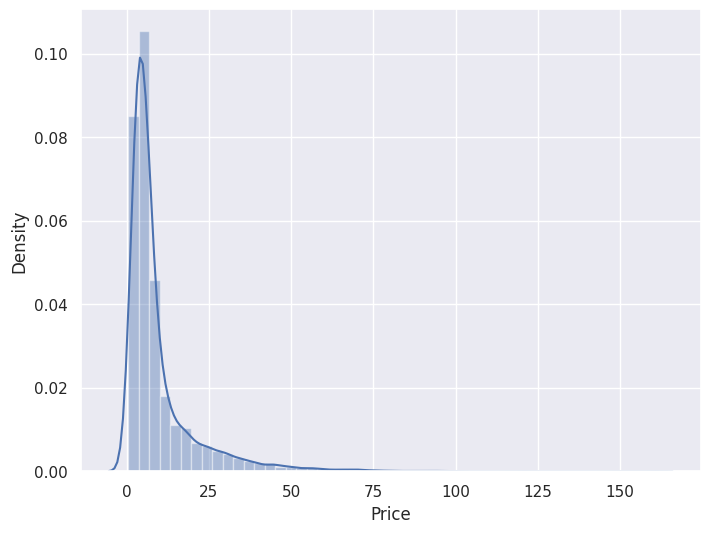

In [ ]:
sns.distplot(car_dataset['Price'])

In [ ]:
car_dataset.nunique()

,0
Name,1876
Location,11
Year,22
Kilometers_Driven,3093
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,442
Engine,146
Power,372


In [ ]:
print(car_dataset.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object


In [ ]:
numerical_data = car_dataset.drop(['Name', 'Location','Fuel_Type', 'Transmission', 'Owner_Type','Mileage','Engine', 'Power'], axis=1)
numerical_data.head()

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


In [ ]:
categorical_data = car_dataset.filter(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage','Engine','Power'], axis=1)
categorical_data.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
0,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp


In [ ]:
categorical_data_one_hot = pd.get_dummies(categorical_data, drop_first= True)
categorical_data_one_hot = categorical_data_one_hot.astype(int)
categorical_data_one_hot.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
complete_dataset = pd.concat([numerical_data, categorical_data_one_hot ], axis=1)
complete_dataset.head()

,Year,Kilometers_Driven,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,2010,72000,5.0,1.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,12.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,4.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,6.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,17.74,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
complete_dataset.isnull().mean()

,0
Year,0.000000
Kilometers_Driven,0.000000
Seats,0.006978
Price,0.000000
Location_Bangalore,0.000000
...,...
Power_98.82 bhp,0.000000
Power_98.96 bhp,0.000000
Power_99 bhp,0.000000
Power_99.6 bhp,0.000000


In [ ]:
complete_dataset.dropna(inplace = True)

In [ ]:
X = complete_dataset.drop(['Price'], axis=1)
y = complete_dataset['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer0 = Dense(100, activation='relu')(input_layer)
dense_layer1 = Dense(50, activation='relu')(dense_layer0)
dense_layer2 = Dense(25, activation='relu')(dense_layer1)
dense_layer3 = Dense(10, activation='relu')(dense_layer2)
dense_layer4 = Dense(5, activation='relu')(dense_layer3)
dense_layer5 = Dense(2, activation='relu')(dense_layer4)
output = Dense(1)(dense_layer5)

In [ ]:
model = Model(inputs = input_layer, outputs=output)
model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])

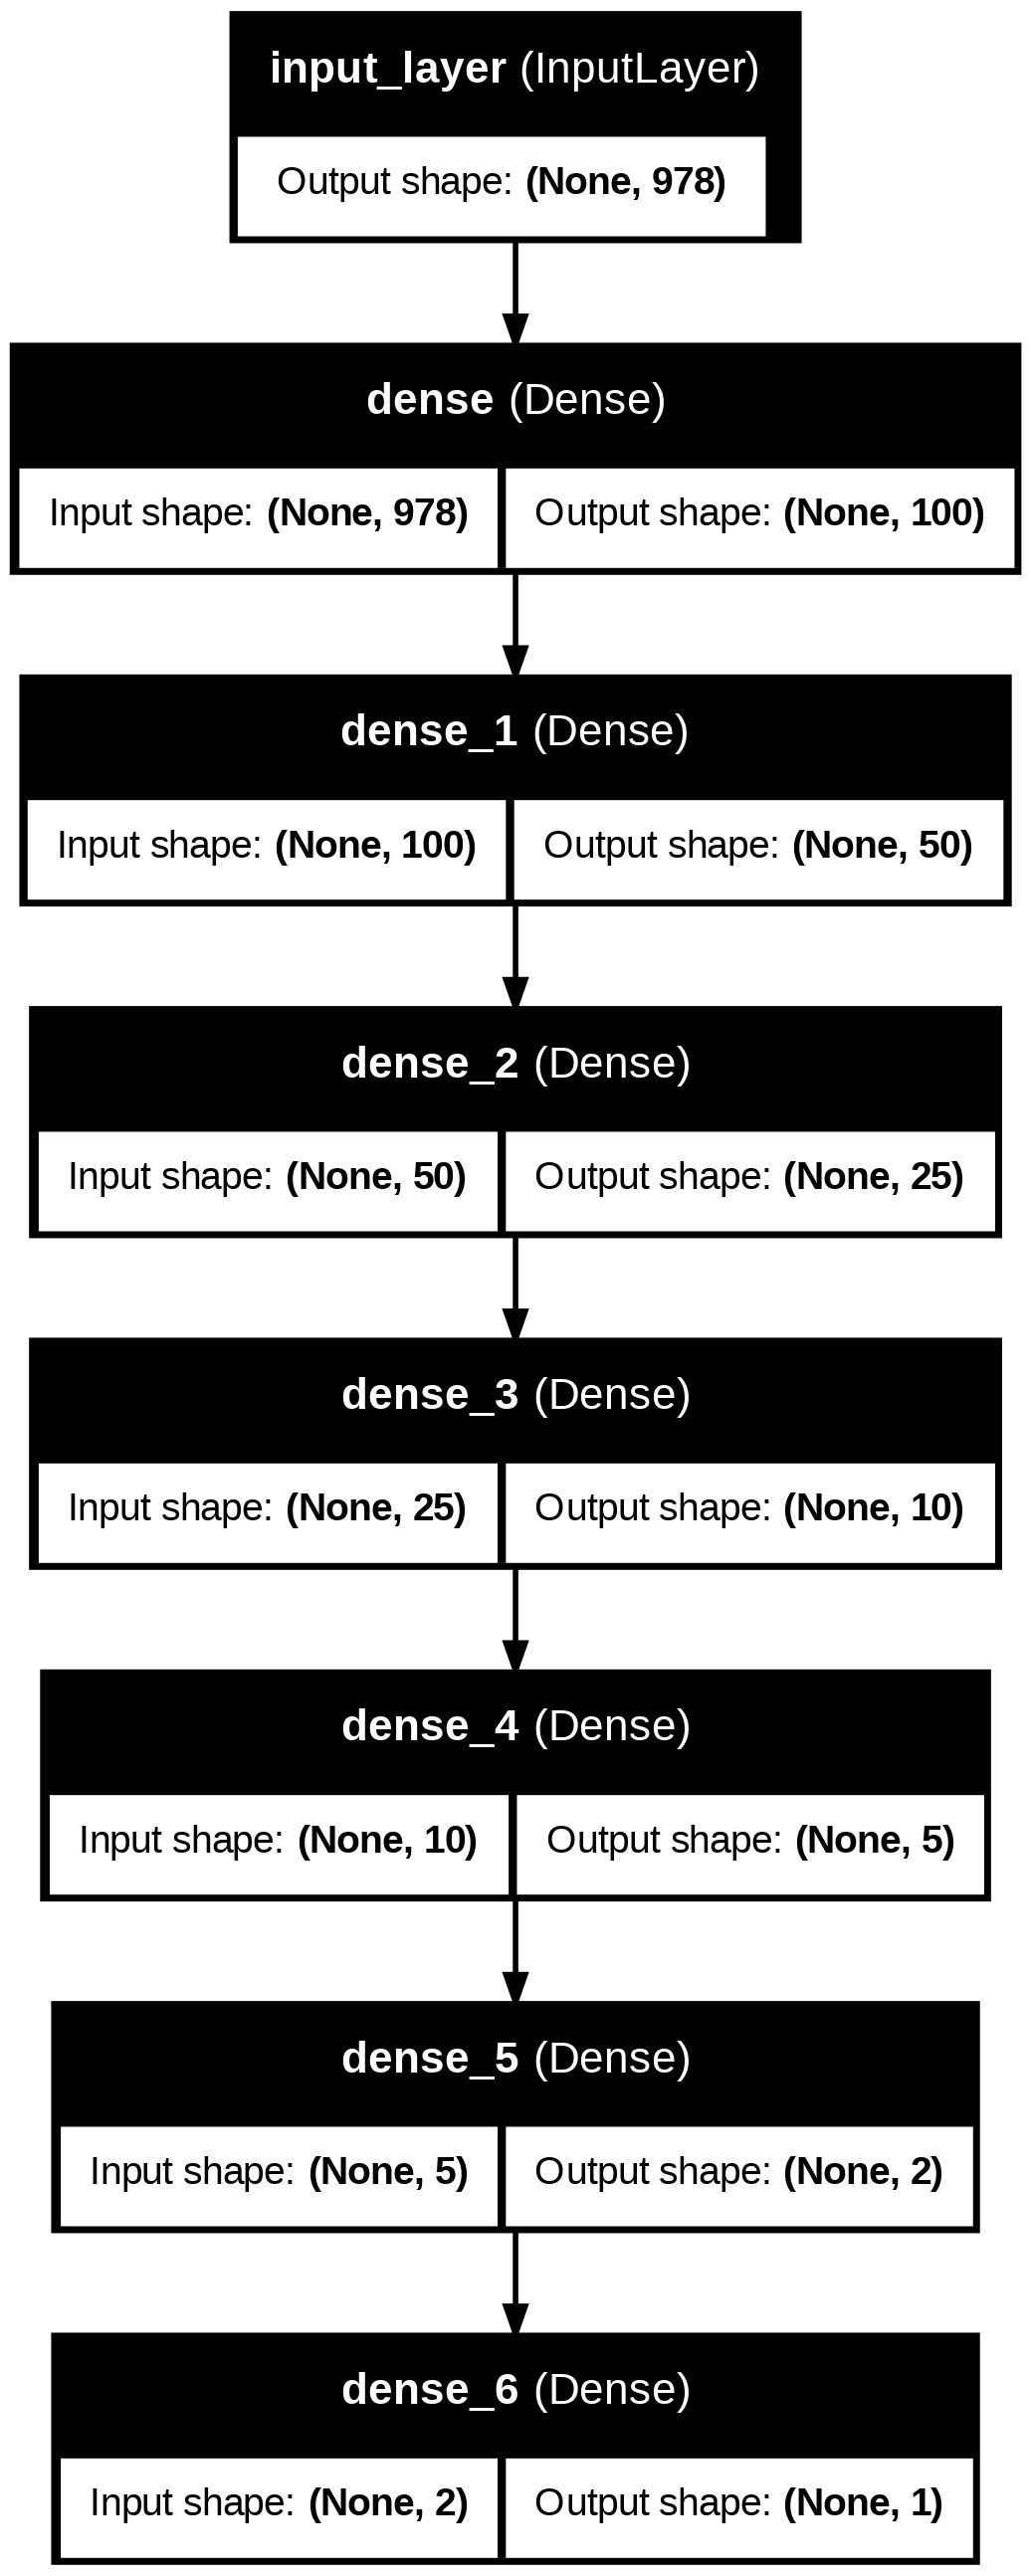

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 4.4268 - mean_absolute_error: 4.4268 - val_loss: 2.6242 - val_mean_absolute_error: 2.6242
Epoch 2/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.4672 - mean_absolute_error: 2.4672 - val_loss: 2.2701 - val_mean_absolute_error: 2.2701
Epoch 3/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.8702 - mean_absolute_error: 1.8702 - val_loss: 1.9164 - val_mean_absolute_error: 1.9164
Epoch 4/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.6637 - mean_absolute_error: 1.6637 - val_loss: 2.2423 - val_mean_absolute_error: 2.2423
Epoch 5/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4987 - mean_absolute_error: 1.4987 - val_loss: 2.0800 - val_mean_absolute_error: 2.0800


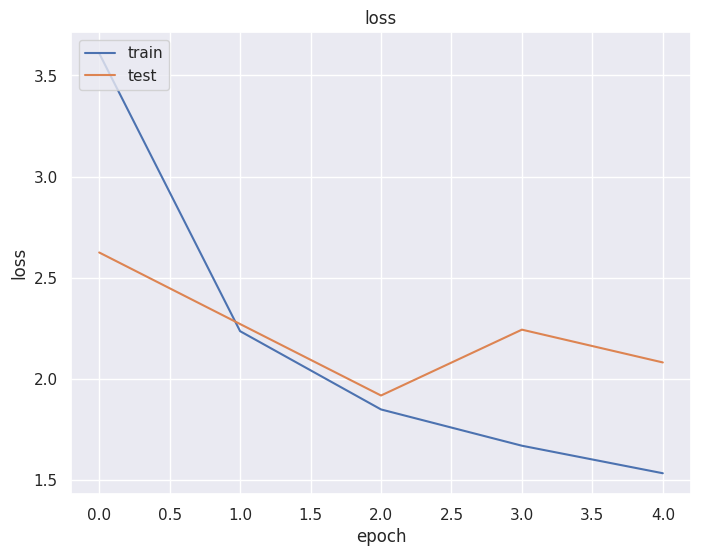

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.8732639620036982
Mean Squared Error: 19.9103574550709
Root Mean Squared Error: 4.462102358201894


In [ ]:
car_dataset['Price'].mean()

np.float64(9.47946835022429)

In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test.values.tolist(), 'Predicted': y_pred.tolist()})
comparison_df

,Actual,Predicted
0,8.25,[8.436525344848633]
1,5.08,[4.627302169799805]
2,4.50,[7.411113739013672]
3,28.50,[31.23143768310547]
4,7.25,[14.33742904663086]
...,...,...
1191,7.50,[9.011796951293945]
1192,21.67,[24.145315170288086]
1193,4.60,[5.142417907714844]
1194,8.00,[6.682852745056152]


In [ ]:
X_test[1].shape

(978,)

In [ ]:
single_point = X_test[1].reshape(1,-1)
single_point.shape

(1, 978)

In [ ]:
model.predict(X_test[1].reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[4.6273026]], dtype=float32)

In [ ]:
y_test.values[1]

np.float64(5.08)